## import modules that will do all the work

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## import the data

In [2]:
df=pd.read_csv('processed.cleveland.data',header=None)

df.head()

In [3]:
df.columns=['age','sex','cp','restbp','chol','fbs','restcg','thalch','exang'
            ,'oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restcg,thalch,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing Data Part 1:Identifying Missing Data

In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restcg     float64
thalch     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

## Missing Data part 2

In [7]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [8]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restcg,thalch,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
len(df)

303

## 303
6 of 303 rows contains missing values there are 297 is plenty of data to build decision
tree ,we will remive the 6 values

In [10]:
df_missing=df.loc[(df['ca']!='?')&(df['thal']!='?')]

In [11]:
len(df_missing)

297

In [12]:
df_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [13]:
df_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [14]:
x=df_missing.drop('hd',axis=1).copy()
x.head()

,age,sex,cp,restbp,chol,fbs,restcg,thalch,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [15]:
y=df_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format Data part 2:One Hot Encoding

| Column Name | Data Type | Description                                                                                                                      |
| ----------- | --------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **age**     | `int`     | Age of the patient in years                                                                                                      |
| **sex**     | `int`     | Sex of the patient: `1 = male`, `0 = female`                                                                                     |
| **cp**      | `int`     | Chest pain type:<br>• `0` = typical angina<br>• `1` = atypical angina<br>• `2` = non-anginal pain<br>• `3` = asymptomatic        |
| **restbp**  | `int`     | Resting blood pressure (in mm Hg on admission to the hospital)                                                                   |
| **chol**    | `int`     | Serum cholesterol level (in mg/dl)                                                                                               |
| **fbs**     | `int`     | Fasting blood sugar > 120 mg/dl (`1 = true`, `0 = false`)                                                                        |
| **restcg**  | `int`     | Resting electrocardiographic results:<br>• `0` = normal<br>• `1` = ST-T wave abnormality<br>• `2` = left ventricular hypertrophy |
| **thalch**  | `int`     | Maximum heart rate achieved                                                                                                      |
| **exang**   | `int`     | Exercise-induced angina (`1 = yes`, `0 = no`)                                                                                    |
| **oldpeak** | `float`   | ST depression induced by exercise relative to rest                                                                               |
| **slope**   | `int`     | The slope of the peak exercise ST segment:<br>• `0` = upsloping<br>• `1` = flat<br>• `2` = downsloping                           |
| **ca**      | `int`     | Number of major vessels (0–3) colored by fluoroscopy                                                                             |
| **thal**    | `int`     | Thalassemia:<br>• `1` = normal<br>• `2` = fixed defect<br>• `3` = reversible defect                                              |
| **hd**      | `int`     | Target variable: presence of heart disease (`1 = yes`, `0 = no`)                                                                 |


In [16]:
x.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restcg     float64
thalch     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

# 🧠 Handling Categorical Data in Machine Learning

## 🔹 Understanding the Issue

In many datasets, some columns appear as **numeric (`float64` or `int64`)**, but they actually represent **categories**  not continuous numerical values.  
For example:

```python
df.dtypes
age        float64
sex        float64
cp         float64
thal       float64
hd         int64
## Why Convert to Category

Machine learning models treat numeric types as continuous.
If we leave categorical columns as float64, the model may assume that higher numbers mean higher magnitude or importance, which is incorrect for categorical values.

➡️ Therefore, we must convert them to categorical type before encoding
## One-Hot Encoding

One-hot encoding creates binary columns (0/1) for each category of a variable.


In [17]:
df['cp'].unique()

array([1., 4., 3., 2.])

In [18]:
x_encoded = pd.get_dummies(x, columns=['cp', 'restcg', 'slope', 'thal'], dtype=int)


x_encoded.head()

,age,sex,restbp,chol,fbs,thalch,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restcg_0.0,restcg_1.0,restcg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [19]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [21]:
y_not_zero=y>0
y[y_not_zero]=1
y.unique()

array([0, 1], dtype=int64)

 ## BUILD A PRELIMINARY CLASSIFIFCATION TREE

In [23]:
 x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(x_train,y_train)

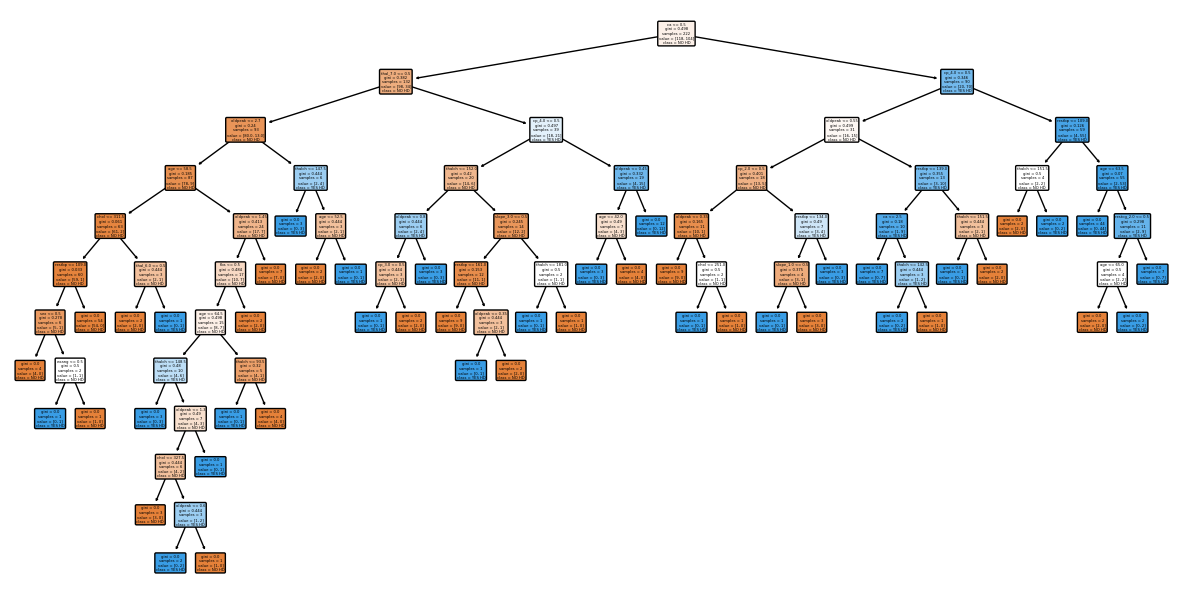

In [26]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["NO HD","YES HD"] ,feature_names=x_encoded.columns);

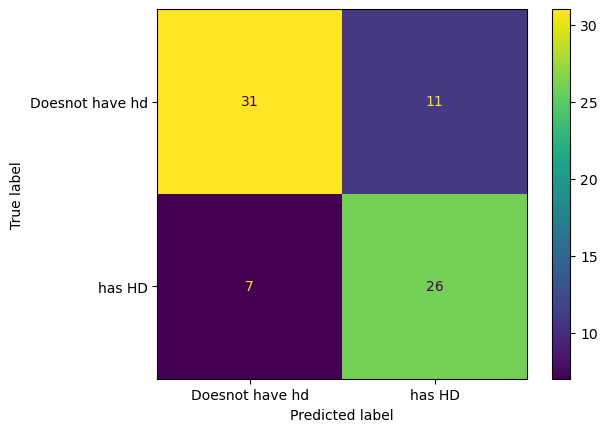

In [32]:
ConfusionMatrixDisplay.from_estimator(clf_dt,x_test,y_test,
                      display_labels=["Doesnot have hd","has HD"])

#in the confusion matrix doesnot have hd :31+11=42 but in this 31 is correctly predicted of not having hd and in has hd:7+26=33 in which 26 correctly predicted of having hd

## Cost Complexity prunning Part 1

In [33]:
path=clf_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]
clf_dts=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)

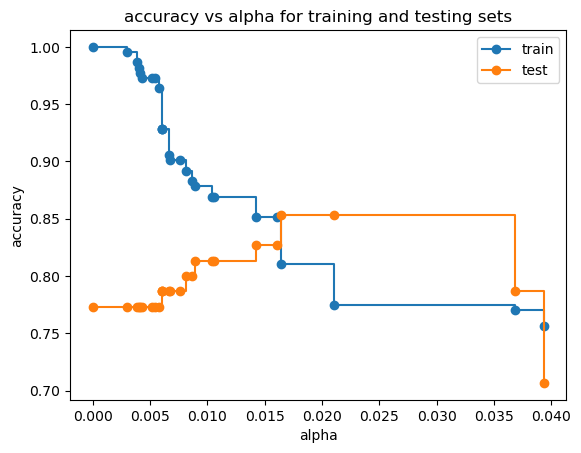

In [36]:
train_scores=[clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

## Cost complexity prunning  part 2:cross validation for best alpha value

<Axes: xlabel='tree'>

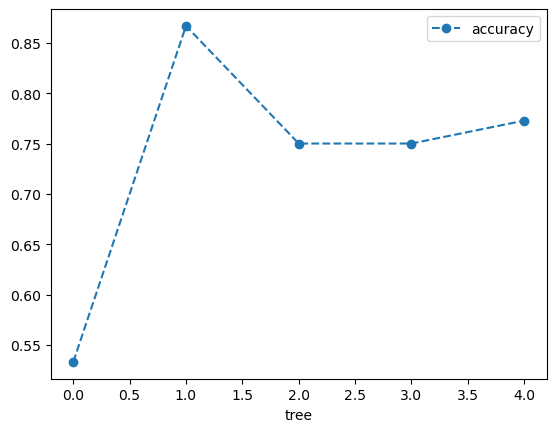

In [37]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

<Axes: xlabel='alpha'>

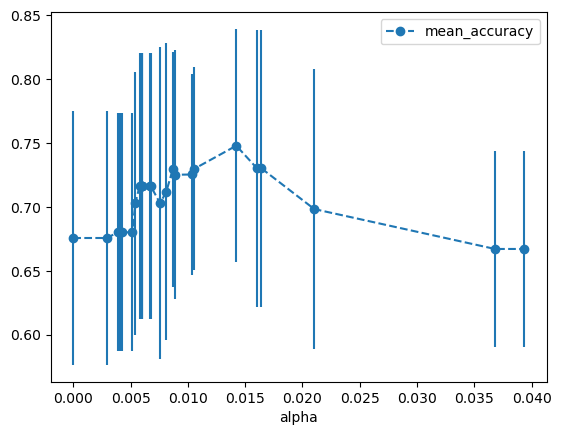

In [38]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std']
                          )
alpha_results.plot(x='alpha',y='mean_accuracy',
                  yerr='std',marker='o',linestyle='--')

In [39]:
alpha_results[(alpha_results['alpha']>0.014)&(alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [41]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)&(alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [42]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

C:\Users\Vignesh\AppData\Local\Temp\ipykernel_12304\809032274.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha=float(ideal_ccp_alpha)


0.014224751066856332

## Building ,Evaluating,Drawing And Inpreting The Final Classification Tree

now we have value for alphaand we can build the final classification tree by setting ccp_alpha=ideal_ccp_alpha

In [43]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(x_train,y_train)

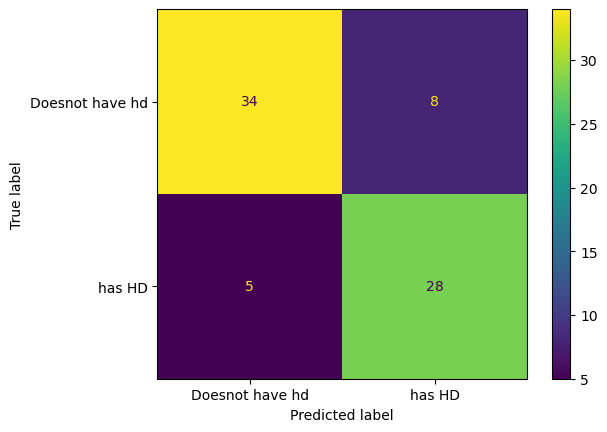

In [44]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,x_test,y_test,
                      display_labels=["Doesnot have hd","has HD"])

#in the confusion matrix doesnot have hd :34+8=42 but in this 34 is correctly predicted of not having hd and in has hd:5+28=33 in which 28 correctly predicted of having hd.
there is improvement over preliminary classification tree after pruning

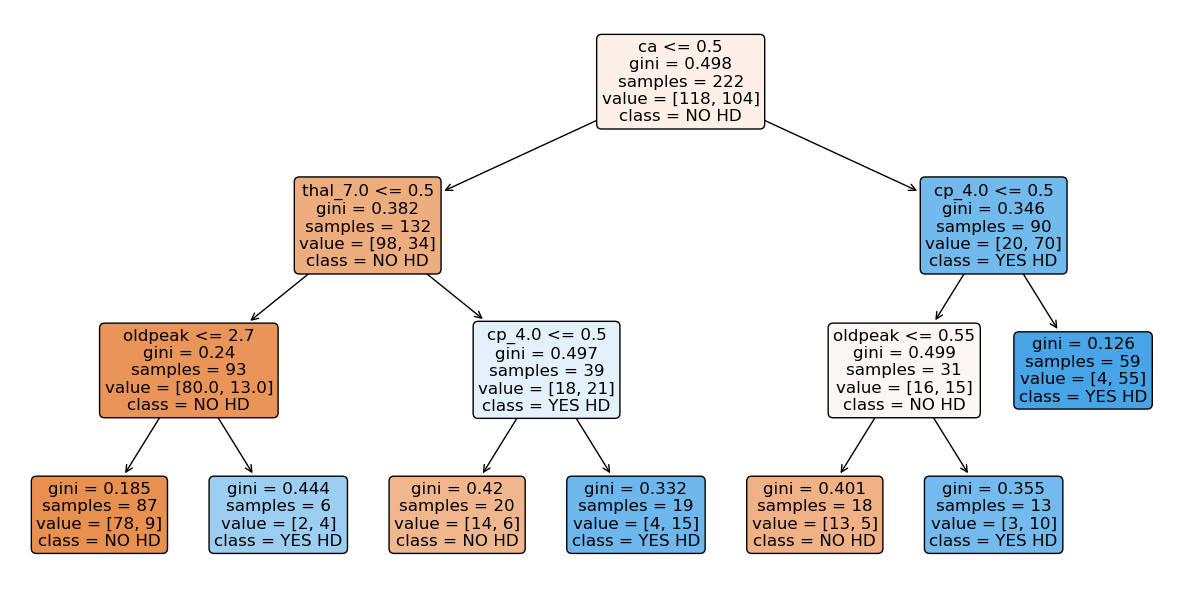

In [45]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["NO HD","YES HD"] ,feature_names=x_encoded.columns);

## 🧠 Decision Tree Interpretation — Heart Disease Classification

---

### 🌳 **Root Node**
- **Feature:** `ca <= 0.5`  
- **Gini:** 0.498  
- **Samples:** 222  
- **Value:** [118, 104] → **Class:** NO HD  
- **Interpretation:**
  - The tree first splits on the **number of major vessels (ca)**.
  - **If `ca ≤ 0.5` →** Move left → fewer/no major vessels → more likely **No Heart Disease**.  
  - **If `ca > 0.5` →** Move right → more vessels → more likely **Has Heart Disease**.

---

### 🌿 **Left Subtree (ca ≤ 0.5)**

#### Node 1
- **Feature:** `thal_7.0 <= 0.5`  
- **Gini:** 0.382  
- **Samples:** 132  
- **Value:** [98, 34] → **Class:** NO HD  
- **Interpretation:**
  - Among patients with `ca ≤ 0.5`, those with `thal ≠ 7` (no reversible defect) are mostly healthy.

##### ➤ Left Child (`thal_7.0 ≤ 0.5`)
- **Feature:** `oldpeak <= 2.7`  
- **Gini:** 0.24  
- **Samples:** 93  
- **Value:** [80, 13] → **Class:** NO HD  
- **Interpretation:**
  - Most patients here have **no heart disease**.  
  - If `oldpeak ≤ 2.7` → 78 NO HD vs 9 YES HD → mostly healthy.  
  - If `oldpeak > 2.7` → 2 NO HD vs 4 YES HD → higher heart disease risk.

##### ➤ Right Child (`thal_7.0 > 0.5`)
- **Feature:** `cp_4.0 <= 0.5`  
- **Gini:** 0.497  
- **Samples:** 39  
- **Value:** [18, 21] → **Class:** YES HD  
- **Interpretation:**
  - If `cp_4.0 ≤ 0.5` (typical angina) → 14 NO HD vs 6 YES HD → mostly healthy.  
  - If `cp_4.0 > 0.5` (atypical or non-anginal pain) → 4 NO HD vs 15 YES HD → likely heart disease.

---

### 🌲 **Right Subtree (ca > 0.5)**

#### Node 2
- **Feature:** `cp_4.0 <= 0.5`  
- **Gini:** 0.346  
- **Samples:** 90  
- **Value:** [20, 70] → **Class:** YES HD  
- **Interpretation:**
  - Patients with **more vessels (ca > 0.5)** and **non-typical chest pain** tend to have **heart disease**.

##### ➤ Left Child (`cp_4.0 ≤ 0.5`)
- **Feature:** `oldpeak <= 0.55`  
- **Gini:** 0.499  
- **Samples:** 31  
- **Value:** [16, 15] → **Class:** NO HD  
- **Interpretation:**
  - If `oldpeak ≤ 0.55` → 13 NO HD vs 5 YES HD → mostly healthy.  
  - If `oldpeak > 0.55` → 3 NO HD vs 10 YES HD → likely heart disease.

##### ➤ Right Child (`cp_4.0 > 0.5`)
- **Gini:** 0.126  
- **Samples:** 59  
- **Value:** [4, 55] → **Class:** YES HD  
- **Interpretation:**  
  - Very strong evidence of **heart disease**.  
  - 55 of 59 patients correctly classified as **YES HD**.

---

### 🩺 **Key Takeaways**
- **Most important features:**
  - `ca` → Number of major vessels  
  - `thal` → Thalassemia type  
  - `cp` → Chest pain type  
  - `oldpeak` → ST depression induced by exercise  

- **Low values (ca, thal_7, oldpeak)** → Usually **NO Heart Disease**  
- **High values (ca, thal_7, oldpeak)** → Usually **YES Heart Disease**  
- The **Gini index** shows some impurity — indicating overlap — but clear predictive patterns exist.
